In [1]:
# Classifiers Models
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,
RandomForestClassifier, VotingClassifier, HistGradientBoostingClassifier, StackingClassifier)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report)

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
df = pd.read_csv('Churn_Modelling.csv', engine='pyarrow')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#drop columns
df.drop(columns=['RowNumber', 'CustomerId',	'Surname'], axis=1, inplace=True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#lowering columns 
df.columns = df.columns.str.lower()

In [6]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.rename(columns={'creditscore':'credit_score', 'numofproducts':'num_of_products',
                   'hascrcard':'credit_card', 'isactivemember':'active_member', 
                   'estimatedsalary':'estimated_salary'}, inplace=True)

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.9 MB


In [9]:
df.isna().sum()

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
credit_card         0
active_member       0
estimated_salary    0
exited              0
dtype: int64

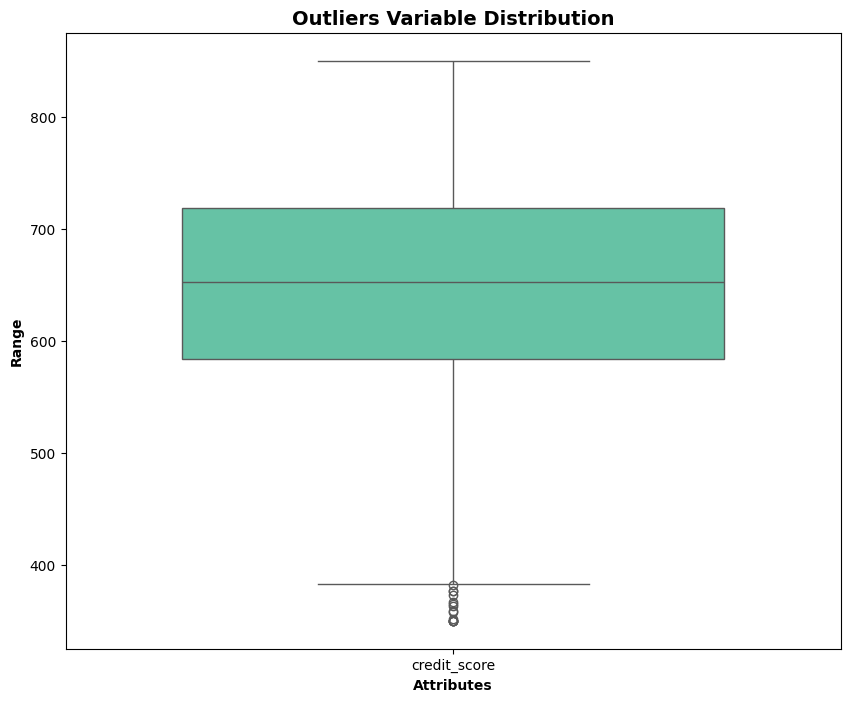

In [10]:
# Visualize Outlier Analysis
attributes = ['credit_score']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[attributes], orient="v", palette="Set2", 
            whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold');

In [11]:
# Removing (statistical) outliers for Frequency
Q1 = df.credit_score.quantile(0.25)
Q3 = df.credit_score.quantile(0.75)
IQR = Q3 - Q1

print(f"Shape {df.shape} with Outliers")
df = df[(df.credit_score >= Q1 - 1.5 * IQR) & (df.credit_score <= Q3 + 1.5 * IQR)]
print(f"Shape {df.shape} without Outliers")

Shape (10000, 11) with Outliers
Shape (9985, 11) without Outliers


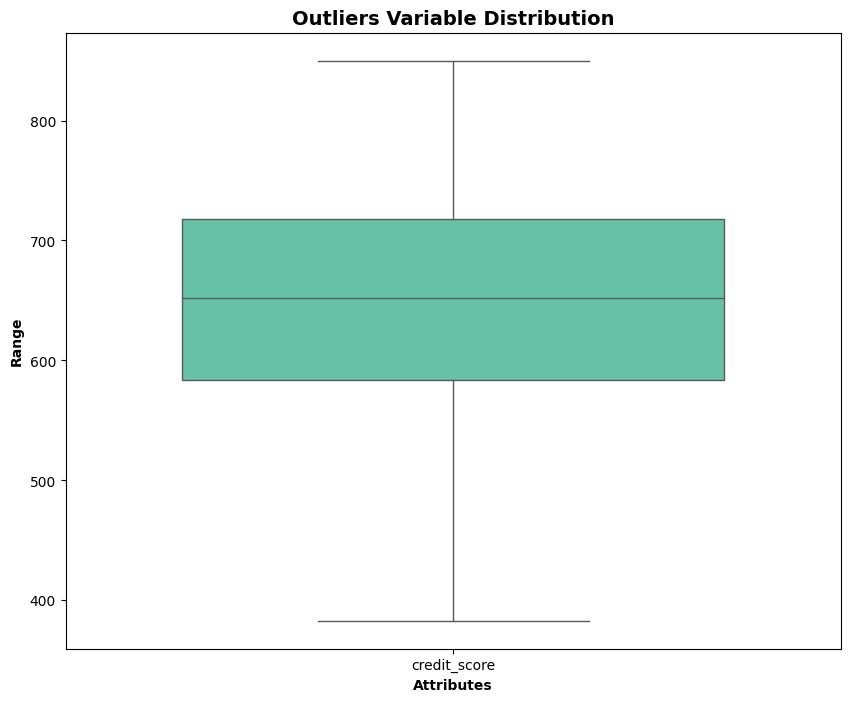

In [12]:
# Visualize Outlier Analysis
attributes = ['credit_score']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[attributes], orient="v", palette="Set2", 
            whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold');

In [13]:
df.select_dtypes('object')

,geography,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [14]:
df['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
categorical_cols = ['geography', 'gender'] 
label_encoders = {}

for col in categorical_cols: 
    le = LabelEncoder() 
    df.loc[:, f'{col}_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for potential inverse transform

In [17]:
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,credit_card,active_member,estimated_salary,exited,geography_encoded,gender_encoded
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0


In [19]:
df.drop(columns=['geography','gender'], inplace=True)

In [20]:
df.head()

,credit_score,age,tenure,balance,num_of_products,credit_card,active_member,estimated_salary,exited,geography_encoded,gender_encoded
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [18]:
df1 = df.copy()

In [22]:
df['exited'].value_counts()

exited
0    7963
1    2022
Name: count, dtype: int64

exited
0    7963
1    2022
Name: count, dtype: int64


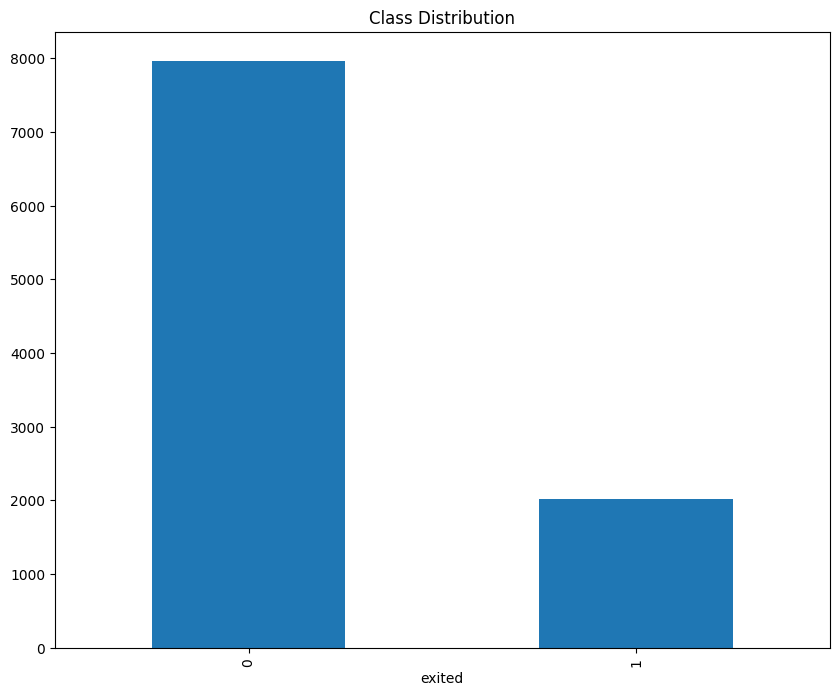

In [23]:
# Visualize imbalance
print(df['exited'].value_counts())
df['exited'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

## Machine Learning to imbalanced dataset

### LogisticRegression

In [53]:
X = df.drop(columns=['exited'], axis=1)
y = df['exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


--- Basic Model Performance ---
Accuracy test set: 0.7917
Accuracy train set: 0.8110

--- Classification Report: ---
Classification Report test set:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      1558
           1       0.58      0.19      0.29       439

    accuracy                           0.79      1997
   macro avg       0.69      0.58      0.58      1997
weighted avg       0.76      0.79      0.75      1997


Classification Report train set:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      6405
           1       0.58      0.17      0.26      1583

    accuracy                           0.81      7988
   macro avg       0.70      0.57      0.58      7988
weighted avg       0.78      0.81      0.77      7988


--- Basic Model Performance Using Pipeline---
Accuracy test set: 0.7947
Accuracy train set: 0.8118

Classification Report:
Classification Report test set:
    

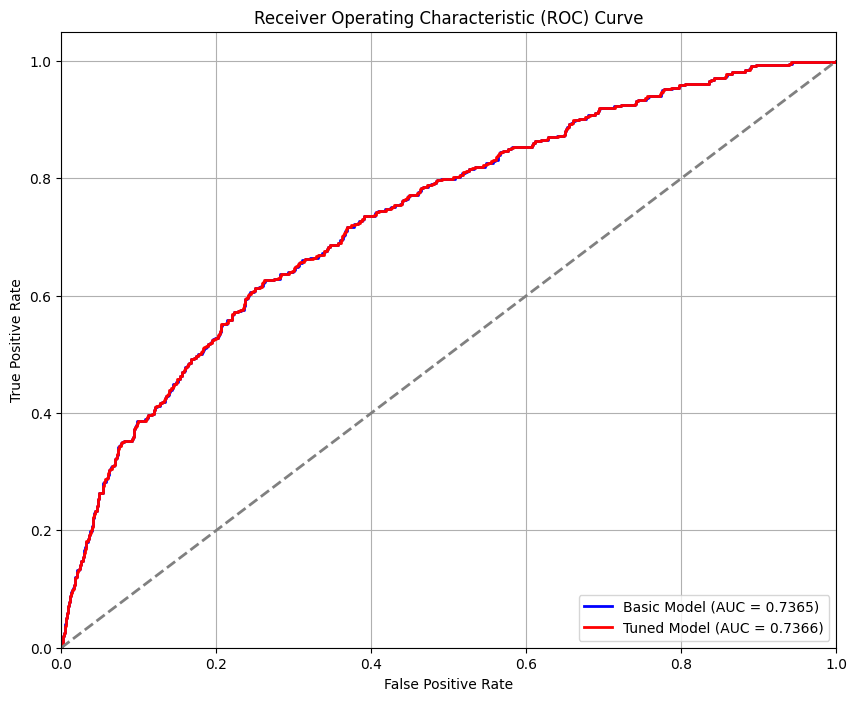

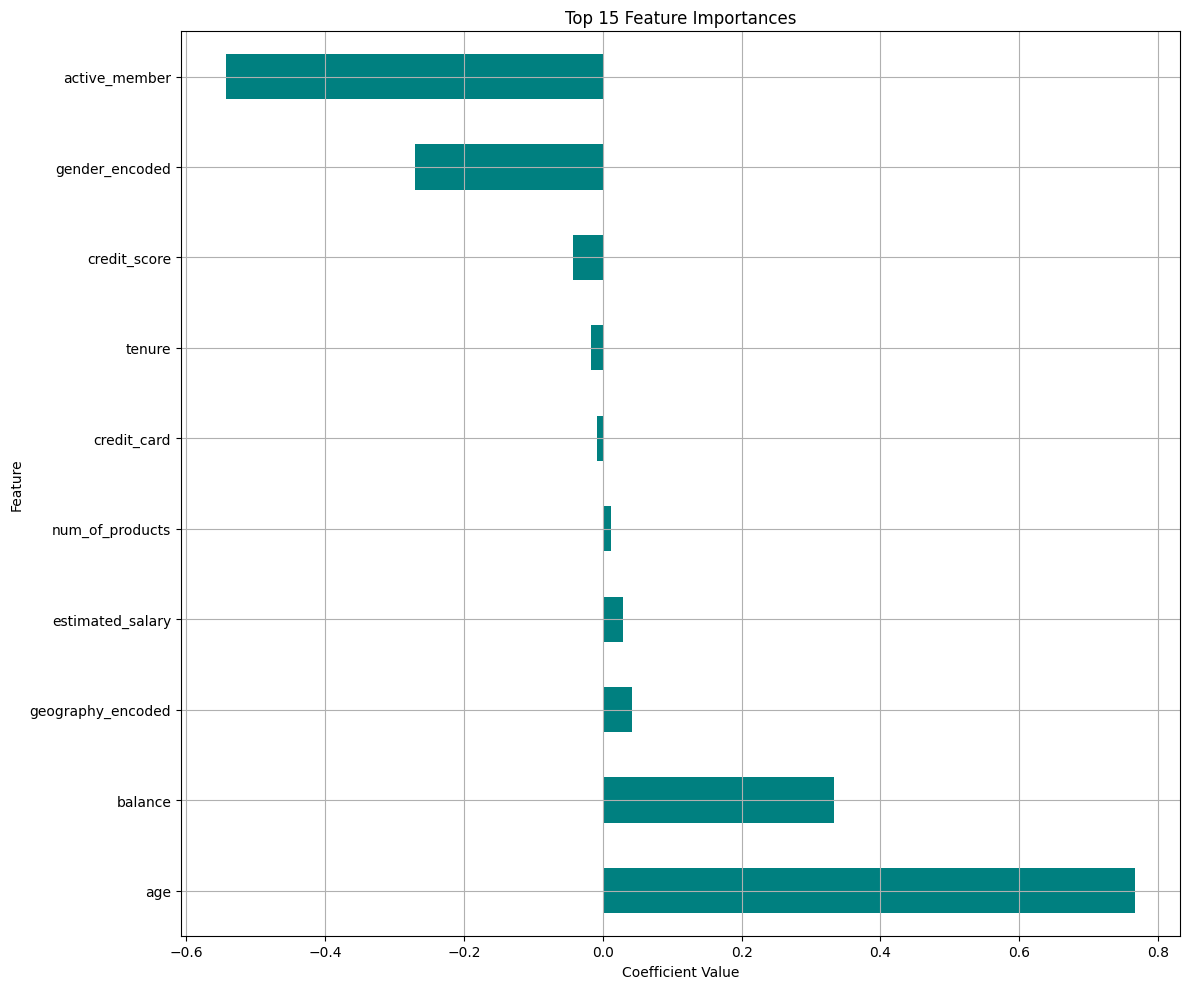


--- Top 10 Most Important Features ---
                   Coefficient
age                   0.766252
balance               0.332825
geography_encoded     0.041450
estimated_salary      0.028722
num_of_products       0.012033
credit_card          -0.009054
tenure               -0.016349
credit_score         -0.043340
gender_encoded       -0.269938
active_member        -0.542501

--- Bottom 10 Least Important Features ---
                   Coefficient
age                   0.766252
balance               0.332825
geography_encoded     0.041450
estimated_salary      0.028722
num_of_products       0.012033
credit_card          -0.009054
tenure               -0.016349
credit_score         -0.043340
gender_encoded       -0.269938
active_member        -0.542501


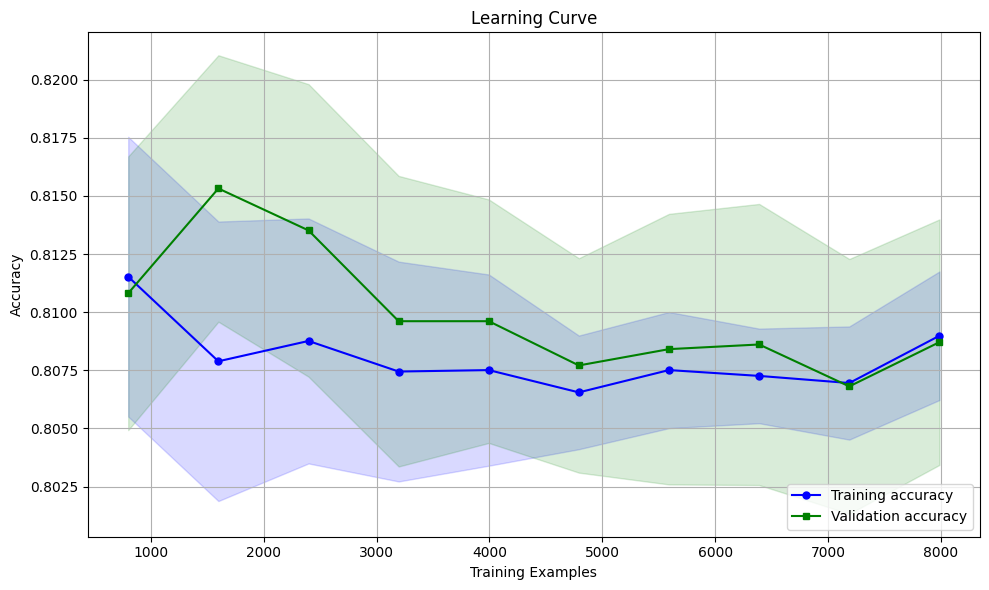

In [24]:
# features and target
X = df.drop(columns=['exited'], axis=1)
y = df['exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Basic model with default parameters 
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

# Evaluate the basic model
print("\n--- Basic Model Performance ---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print("\n--- Classification Report: ---")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_lr)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train_lr)}")

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(random_state=42))  # Logistic regression model
])

# Basic model with default parameters using pipeline
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluate the basic model
print("\n--- Basic Model Performance Using Pipeline---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train)}")

# Display confusion matrix
print("--- Confusion Matrix: ---")
print(f"Confusion Matrix test set:\n {confusion_matrix(y_test, y_pred)}\n")
print(f"Confusion Matrix train set:\n {confusion_matrix(y_train, y_pred_train)}")

# Hyperparameter tuning with GridSearchCV
print("\n--- Model With Hyperparameter Tuning ---")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear', 'saga'],  # Algorithm to use
    'classifier__max_iter': [100, 500, 1000],  # Max iterations
    'classifier__class_weight': [None, 'balanced']  # Class weighting
}

# Create grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"\nBest Parameters: {grid_search.best_params_}\n")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

print("\n--- Tuned Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\n--- Classification Report: ---")
print(classification_report(y_test, y_pred_tuned))

# Compare basic and tuned models
print("\n--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")

# Calculate cross-validation scores for both models
cv_scores_basic = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
cv_scores_tuned = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"\nBasic Model Cross-Validation Scores: {cv_scores_basic}\n")
print(f"Basic Model Average CV Score: {cv_scores_basic.mean():.4f} ± {cv_scores_basic.std():.4f}")
print(f"\nTuned Model Cross-Validation Scores: {cv_scores_tuned}\n")
print(f"Tuned Model Average CV Score: {cv_scores_tuned.mean():.4f} ± {cv_scores_tuned.std():.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 8))

# Calculate ROC curve for basic model using pipeline 
y_prob_basic = pipeline.predict_proba(X_test)[:, 1]
fpr_basic, tpr_basic, _ = roc_curve(y_test, y_prob_basic)
roc_auc_basic = auc(fpr_basic, tpr_basic)

# Calculate ROC curve for tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot both curves
plt.plot(fpr_basic, tpr_basic, color='blue', lw=2, label=f'Basic Model (AUC = {roc_auc_basic:.4f})')
plt.plot(fpr_tuned, tpr_tuned, color='red', lw=2, label=f'Tuned Model (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('roc_curve_comparison.png')
#plt.close() 
plt.show()

# Feature importance
final_model = best_model.named_steps['classifier']
if hasattr(final_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        final_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("\n--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("\n--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))

# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

## Machine Learning to balanced dataset

In [25]:
df[df['exited'] == 0]

,credit_score,age,tenure,balance,num_of_products,credit_card,active_member,estimated_salary,exited,geography_encoded,gender_encoded
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,28,7,155060.41,1,1,0,29179.52,0,0,1
9994,800,29,2,0.00,2,0,0,167773.55,0,0,0
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1


In [26]:
df[df['exited'] == 1]

,credit_score,age,tenure,balance,num_of_products,credit_card,active_member,estimated_salary,exited,geography_encoded,gender_encoded
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
5,645,44,8,113755.78,2,1,0,149756.71,1,2,1
16,653,58,1,132602.88,1,1,0,5097.67,1,1,1
22,510,38,4,0.00,1,1,0,118913.53,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,42,3,152039.70,1,1,1,53445.17,1,1,1
9982,655,46,7,137145.12,1,1,0,115146.40,1,1,0
9991,597,53,4,88381.21,1,1,0,69384.71,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0


In [29]:
from sklearn.utils import resample

df_majority = df[df['exited'] == 0]
df_minority = df[df['exited'] == 1]

df_minority_upsampled = resample(df_minority, replace=True,    # sample with replacement
                                n_samples=len(df_majority),    # to match majority class
                                random_state=42)

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

In [30]:
#pd.concat([df_majority, df_minority_upsampled])

In [31]:
df_balanced.head()

,credit_score,age,tenure,balance,num_of_products,credit_card,active_member,estimated_salary,exited,geography_encoded,gender_encoded
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1


exited
0    7963
1    7963
Name: count, dtype: int64


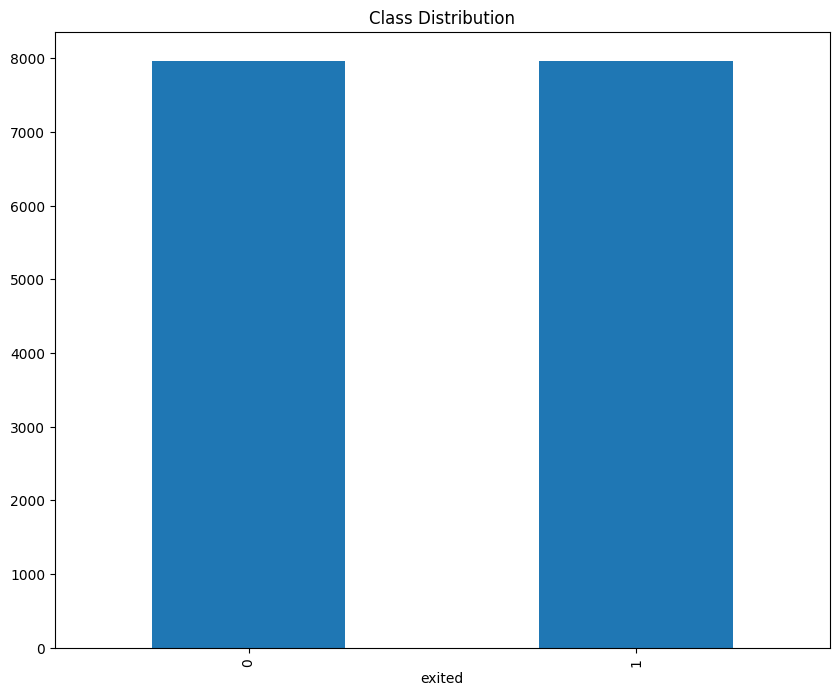

In [32]:
# Visualize imbalance
print(df_balanced['exited'].value_counts())
df_balanced['exited'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()

In [39]:
df_balanced = df_balanced.reset_index(drop=True)

In [40]:
df_balanced.head()

,credit_score,age,tenure,balance,num_of_products,credit_card,active_member,estimated_salary,exited,geography_encoded,gender_encoded
0,608,41,1,83807.86,1,0,1,112542.58,0,2,0
1,699,39,1,0.00,2,0,0,93826.63,0,0,0
2,850,43,2,125510.82,1,1,1,79084.10,0,2,0
3,822,50,7,0.00,2,1,1,10062.80,0,0,1
4,501,44,4,142051.07,2,0,1,74940.50,0,0,1


In [41]:
df_balanced.isna().sum()

credit_score         0
age                  0
tenure               0
balance              0
num_of_products      0
credit_card          0
active_member        0
estimated_salary     0
exited               0
geography_encoded    0
gender_encoded       0
dtype: int64

In [42]:
df_balanced[df_balanced['exited'] == 0]

,credit_score,age,tenure,balance,num_of_products,credit_card,active_member,estimated_salary,exited,geography_encoded,gender_encoded
0,608,41,1,83807.86,1,0,1,112542.58,0,2,0
1,699,39,1,0.00,2,0,0,93826.63,0,0,0
2,850,43,2,125510.82,1,1,1,79084.10,0,2,0
3,822,50,7,0.00,2,1,1,10062.80,0,0,1
4,501,44,4,142051.07,2,0,1,74940.50,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7958,644,28,7,155060.41,1,1,0,29179.52,0,0,1
7959,800,29,2,0.00,2,0,0,167773.55,0,0,0
7960,771,39,5,0.00,2,1,0,96270.64,0,0,1
7961,516,35,10,57369.61,1,1,1,101699.77,0,0,1


In [43]:
df_balanced[df_balanced['exited'] == 1]

,credit_score,age,tenure,balance,num_of_products,credit_card,active_member,estimated_salary,exited,geography_encoded,gender_encoded
7963,738,44,2,0.00,2,1,0,43018.82,1,2,1
7964,707,48,8,88441.64,1,1,1,119903.20,1,2,1
7965,618,48,7,0.00,1,1,0,13921.82,1,0,1
7966,757,55,9,117294.12,4,1,0,94187.47,1,2,0
7967,580,44,9,143391.07,1,0,0,146891.07,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
15921,610,69,5,86038.21,3,0,0,192743.06,1,1,0
15922,720,64,3,45752.78,2,1,0,79623.28,1,2,1
15923,768,49,1,133384.66,1,1,0,102397.22,1,1,1
15924,602,53,5,98268.84,1,0,1,45038.29,1,1,0


In [44]:
X = df_balanced.drop(columns=['exited'], axis=1)
y = df_balanced['exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train.shape

(12740, 10)

In [58]:
X_test.shape

(3186, 10)

In [62]:
y_train.value_counts()

exited
1    6382
0    6358
Name: count, dtype: int64

In [60]:
y_test.value_counts()

exited
0    1605
1    1581
Name: count, dtype: int64


--- Basic Model Performance ---
Accuracy test set: 0.6993
Accuracy train set: 0.6980

--- Classification Report: ---
Classification Report test set:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70      1605
           1       0.70      0.69      0.70      1581

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186


Classification Report train set:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70      6358
           1       0.70      0.69      0.70      6382

    accuracy                           0.70     12740
   macro avg       0.70      0.70      0.70     12740
weighted avg       0.70      0.70      0.70     12740


--- Basic Model Performance Using Pipeline---
Accuracy test set: 0.7018
Accuracy train set: 0.6987

Classification Report:
Classification Report test set:
    

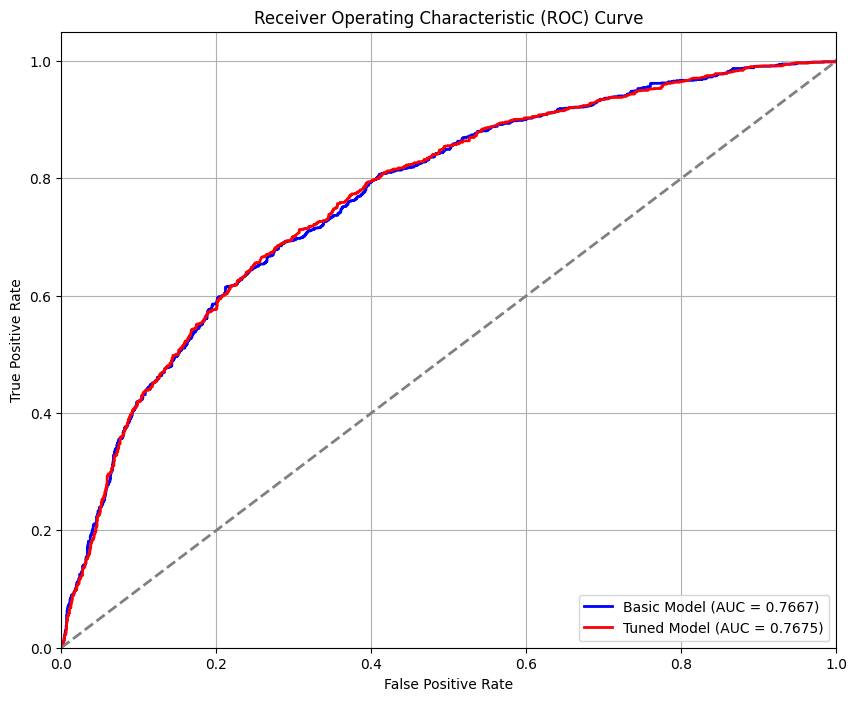

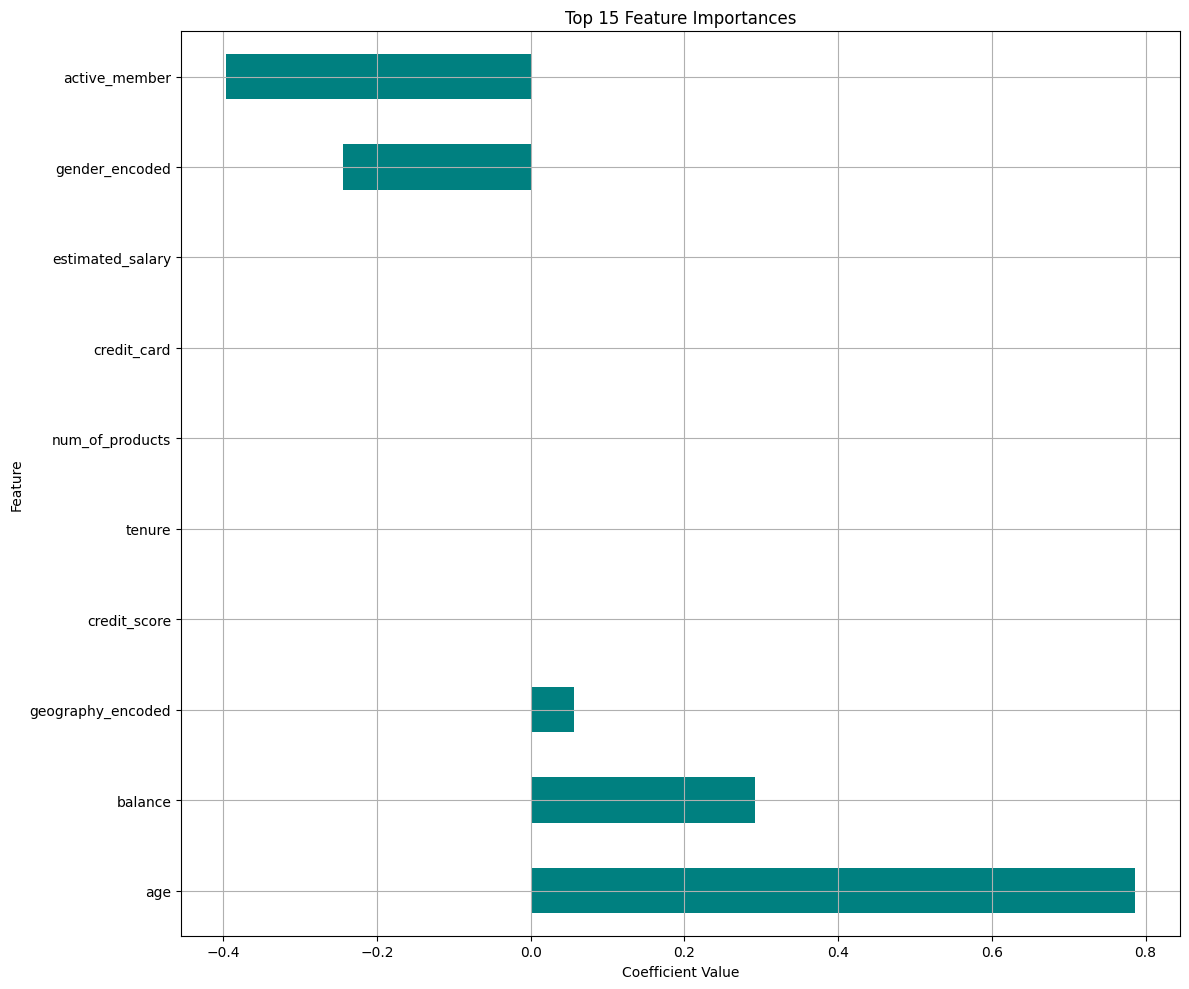


--- Top 10 Most Important Features ---
                   Coefficient
age                   0.785656
balance               0.292532
geography_encoded     0.056216
credit_score          0.000000
tenure                0.000000
num_of_products       0.000000
credit_card           0.000000
estimated_salary      0.000000
gender_encoded       -0.243940
active_member        -0.395739

--- Bottom 10 Least Important Features ---
                   Coefficient
age                   0.785656
balance               0.292532
geography_encoded     0.056216
credit_score          0.000000
tenure                0.000000
num_of_products       0.000000
credit_card           0.000000
estimated_salary      0.000000
gender_encoded       -0.243940
active_member        -0.395739


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/py

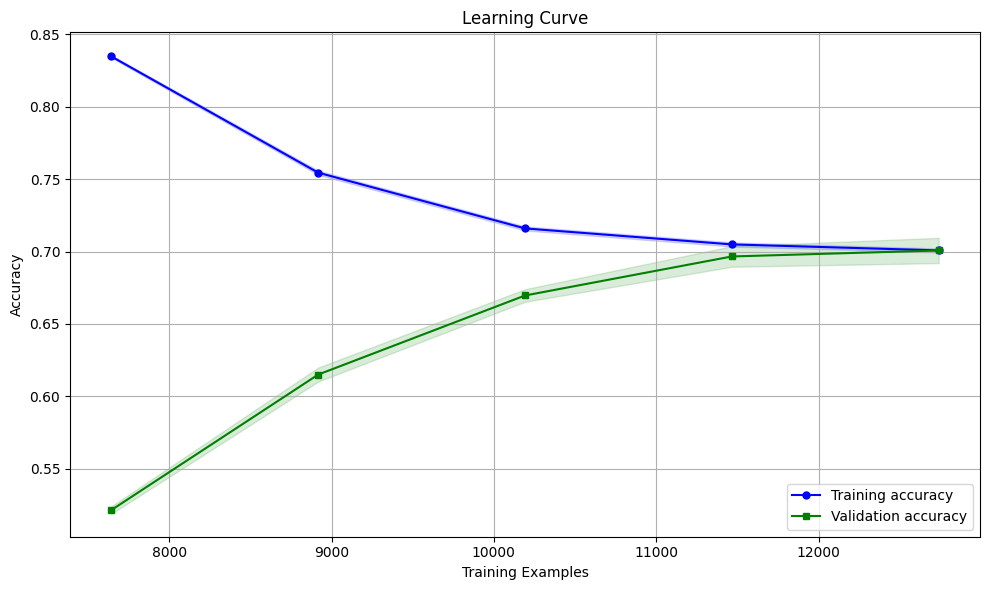

In [66]:
# Basic model with default parameters 
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

# Evaluate the basic model
print("\n--- Basic Model Performance ---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print("\n--- Classification Report: ---")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_lr)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train_lr)}")

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(random_state=42, max_iter=100000))  # Logistic regression model
])

# Basic model with default parameters using pipeline
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluate the basic model
print("\n--- Basic Model Performance Using Pipeline---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train)}")

# Display confusion matrix
print("--- Confusion Matrix: ---")
print(f"Confusion Matrix test set:\n {confusion_matrix(y_test, y_pred)}\n")
print(f"Confusion Matrix train set:\n {confusion_matrix(y_train, y_pred_train)}")

# Hyperparameter tuning with GridSearchCV
print("\n--- Model With Hyperparameter Tuning ---")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear', 'saga'],  # Algorithm to use
    'classifier__max_iter': [100, 500, 1000],  # Max iterations
    'classifier__class_weight': [None, 'balanced']  # Class weighting
}

# Create grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

print("\n--- Tuned Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\n--- Classification Report: ---")
print(classification_report(y_test, y_pred_tuned))

# Compare basic and tuned models
print("\n--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}\n")

# Calculate cross-validation scores for both models
cv_scores_basic = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
cv_scores_tuned = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Cross-Validation Scores: {cv_scores_basic}")
print(f"Tuned Model Cross-Validation Scores: {cv_scores_tuned}\n")
print(f"Basic Model Average CV Score: {cv_scores_basic.mean():.4f} ± {cv_scores_basic.std():.4f}")
print(f"Tuned Model Average CV Score: {cv_scores_tuned.mean():.4f} ± {cv_scores_tuned.std():.4f}")

# Plot ROC curve
plt.figure(figsize=(10, 8))

# Calculate ROC curve for basic model using pipeline 
y_prob_basic = pipeline.predict_proba(X_test)[:, 1]
fpr_basic, tpr_basic, _ = roc_curve(y_test, y_prob_basic)
roc_auc_basic = auc(fpr_basic, tpr_basic)

# Calculate ROC curve for tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot both curves
plt.plot(fpr_basic, tpr_basic, color='blue', lw=2, label=f'Basic Model (AUC = {roc_auc_basic:.4f})')
plt.plot(fpr_tuned, tpr_tuned, color='red', lw=2, label=f'Tuned Model (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('roc_curve_comparison.png')
#plt.close() 
plt.show()

# Feature importance
final_model = best_model.named_steps['classifier']
if hasattr(final_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        final_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("\n--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("\n--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))

# Learning curve
from sklearn.model_selection import learning_curve, StratifiedKFold

# Start with larger minimum training size
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=stratified_cv, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Start from 10% 
    scoring='accuracy', 
    #error_score='raise'  # This will show you exactly what's failing
    #error_score=0.0  # Set failed fits to 0 accuracy
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

In [67]:
import numpy as np
from collections import Counter

print("Class distribution:", Counter(y))
print("Unique classes:", np.unique(y))
print("Class proportions:", np.bincount(y) / len(y))

Class distribution: Counter({0: 7963, 1: 7963})
Unique classes: [0 1]
Class proportions: [0.5 0.5]


### AdaBoostClassifier


--- Basic AdaBoost Model ---
Accuracy test set: 0.7671
Accuracy train set: 0.7676

 --- Classification Report: ---
Classification Report test set:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77      1605
           1       0.77      0.76      0.76      1581

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186


Classification Report train set:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      6358
           1       0.77      0.76      0.77      6382

    accuracy                           0.77     12740
   macro avg       0.77      0.77      0.77     12740
weighted avg       0.77      0.77      0.77     12740


--- Grid Search for Hyperparameter Tuning ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters: {'estimator__max_depth': 5, 'learni

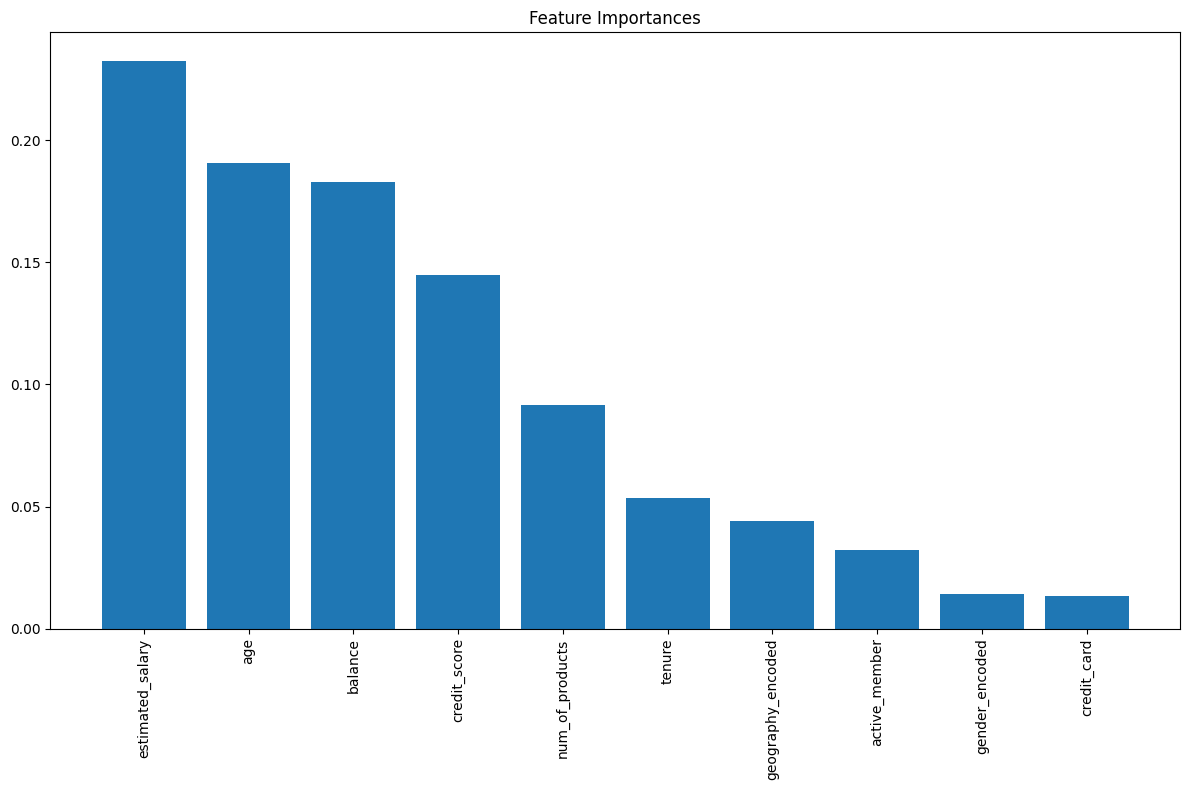


--- Confusion Matrix ---


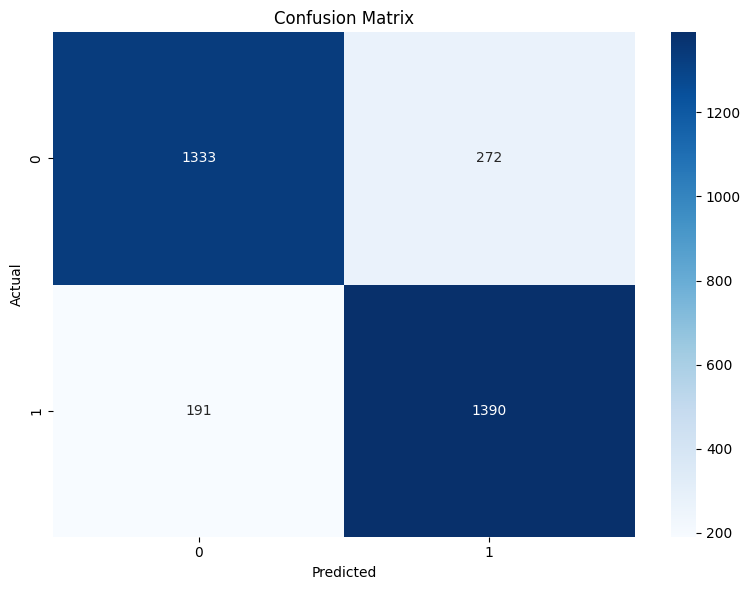


--- ROC Curve ---


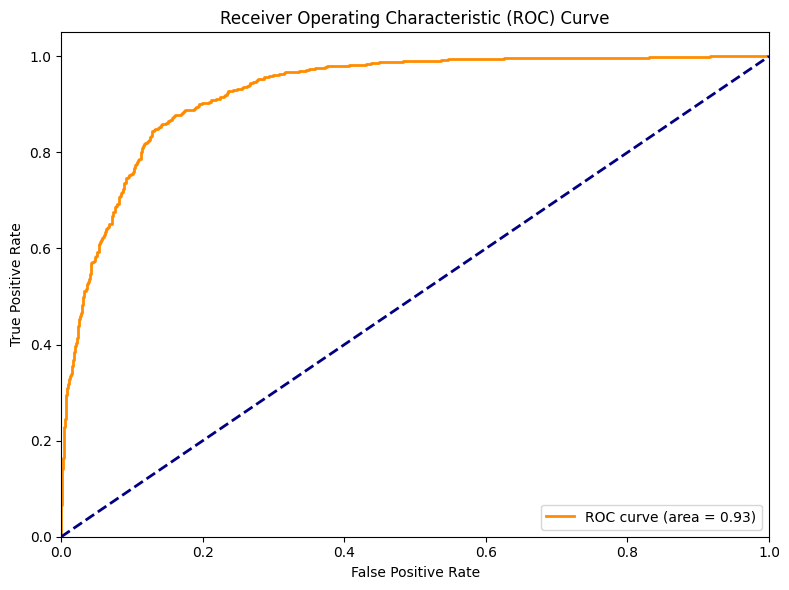


--- Learning Curve ---


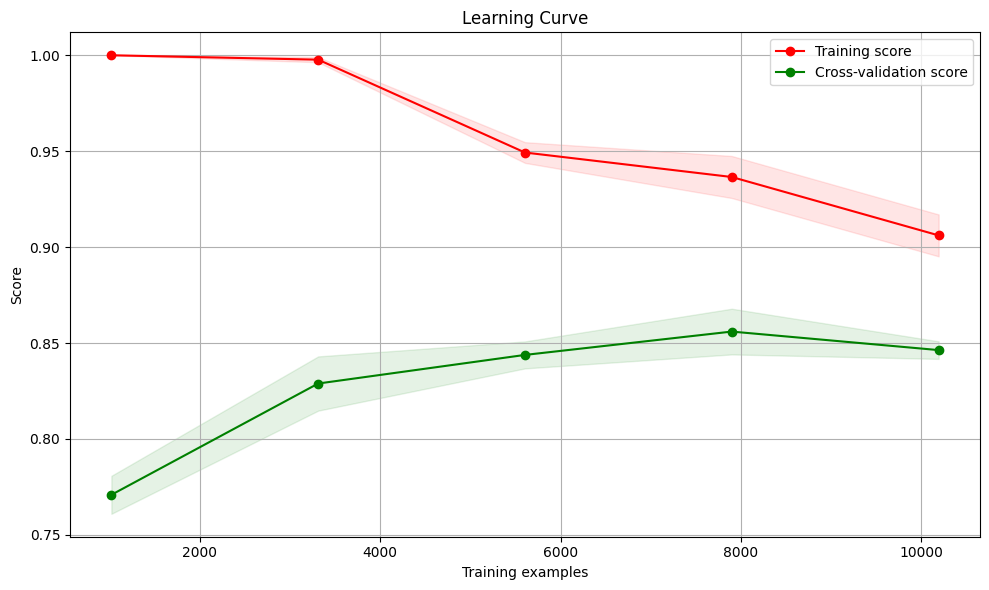


--- Effect of Learning Rate ---


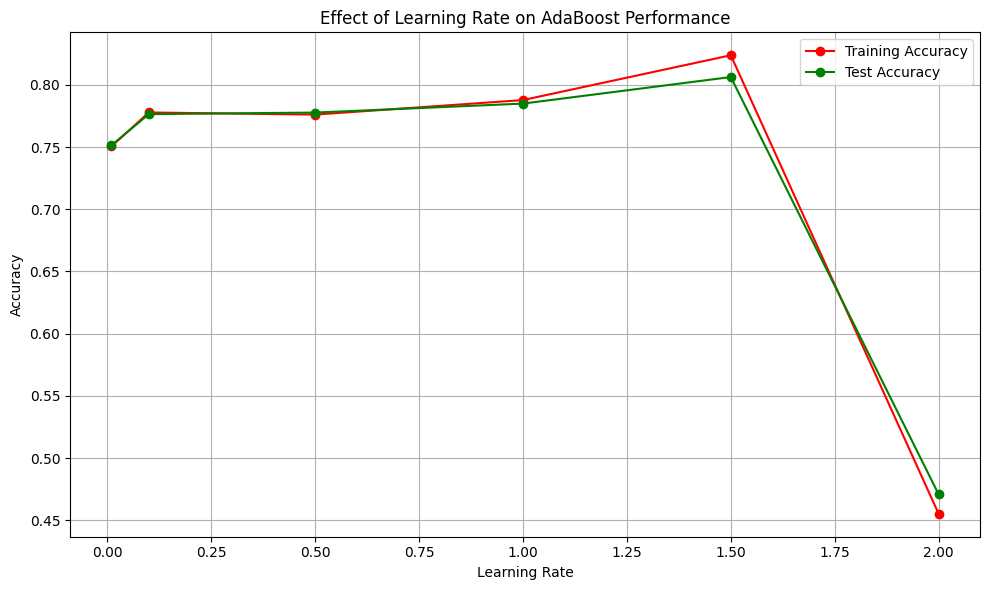


--- Effect of Number of Estimators ---


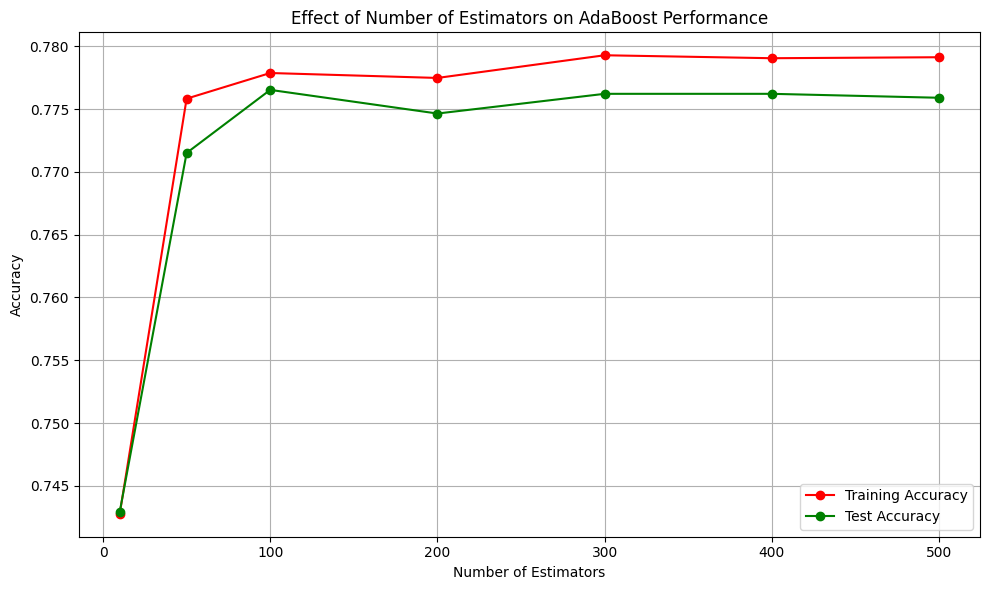


--- Pipeline with AdaBoost ---
Best pipeline parameters: {'adaboost__n_estimators': 100, 'adaboost__learning_rate': 1.0, 'adaboost__estimator': DecisionTreeClassifier(max_depth=3, random_state=42)}
Best cross-validation score: 0.7838

Pipeline test accuracy:  0.7850
Pipeline train accuracy: 0.7878

--- Model Comparison ---
Base AdaBoost accuracy: 0.7671
Grid Search tuned accuracy: 0.8547
Pipeline tuned accuracy: 0.7850

Final Classification Report:
Base AdaBoost accuracy:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77      1605
           1       0.77      0.76      0.76      1581

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186


Grid Search tuned accuracy:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1605
           1       0.84      0.88      0.86      1581



In [74]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Basic AdaBoost model with default parameters
print("\n--- Basic AdaBoost Model ---")
base_model = AdaBoostClassifier(random_state=42, algorithm='SAMME')
base_model.fit(X_train_scaled, y_train)
y_pred = base_model.predict(X_test_scaled)
y_pred_train = base_model.predict(X_train_scaled)

print(f"Accuracy test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print("\n --- Classification Report: ---")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train)}")

# Grid search for hyperparameter tuning
print("\n--- Grid Search for Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 3, 5]
}

# Create base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Create AdaBoost model
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42, algorithm='SAMME')

# Create grid search
grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}\n")

# Train model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_grid = best_model.predict(X_test_scaled)
y_pred_grid_train = best_model.predict(X_train_scaled)
print(f"Test accuracy with best model test set: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Test accuracy with best model train set: {accuracy_score(y_train, y_pred_grid_train):.4f}")

# Visualize feature importances
def plot_feature_importance(model, feature_names):
    # For AdaBoost, feature_importances_ is available after fitting
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        # For pipeline, need to access the classifier
        importances = model.named_steps['adaboost'].feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.bar(range(len(indices[:15])), importances[indices[:15]], align='center')
    plt.xticks(range(len(indices[:15])), [feature_names[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.show()

print("\n--- Feature Importances ---")
plot_feature_importance(best_model, X_train.columns)

# confusion matrix 
def plot_confusion_matrix(y_true, y_pred, classes=None):
    cm = confusion_matrix(y_true, y_pred)
    
    # If classes not provided, determine them automatically
    if classes is None:
        classes = sorted(set(y_true) | set(y_pred))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

print("\n--- Confusion Matrix ---")
plot_confusion_matrix(y_test, y_pred_grid)

# ROC curve
def plot_roc_curve(model, X, y):
    y_score = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

print("\n--- ROC Curve ---")
plot_roc_curve(best_model, X_test_scaled, y_test)

# Learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve", ylim=None, cv=5, n_jobs=-1):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, 
        train_sizes=np.linspace(.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

print("\n--- Learning Curve ---")
plot_learning_curve(best_model, X_train_scaled, y_train)

# Effect of different learning rates
def plot_learning_rate_effect():
    learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
    train_scores = []
    test_scores = []
    
    for lr in learning_rates:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=100,
            learning_rate=lr,
            algorithm='SAMME',
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        train_scores.append(accuracy_score(y_train, model.predict(X_train_scaled)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, train_scores, 'o-', color='r', label='Training Accuracy')
    plt.plot(learning_rates, test_scores, 'o-', color='g', label='Test Accuracy')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title('Effect of Learning Rate on AdaBoost Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n--- Effect of Learning Rate ---")
plot_learning_rate_effect()

# Effect of number of estimators
def plot_n_estimators_effect():
    n_estimators_range = [10, 50, 100, 200, 300, 400, 500]
    train_scores = []
    test_scores = []
    
    for n_est in n_estimators_range:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=n_est,
            learning_rate=0.1,
            algorithm='SAMME',
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        train_scores.append(accuracy_score(y_train, model.predict(X_train_scaled)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, train_scores, 'o-', color='r', label='Training Accuracy')
    plt.plot(n_estimators_range, test_scores, 'o-', color='g', label='Test Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.title('Effect of Number of Estimators on AdaBoost Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n--- Effect of Number of Estimators ---")
plot_n_estimators_effect()

# Pipeline example with AdaBoost
print("\n--- Pipeline with AdaBoost ---")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostClassifier(random_state=42, algorithm='SAMME'))
])

# Parameters for pipeline
pipeline_params = {
    'adaboost__estimator': [DecisionTreeClassifier(max_depth=1, random_state=42),
                           DecisionTreeClassifier(max_depth=3, random_state=42)],
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 1.0]
}

# Randomized search to speed up the tuning process
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=pipeline_params,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit randomized search
random_search.fit(X_train, y_train)  # Note: Using unscaled data since scaling is part of the pipeline

# Print best parameters
print(f"Best pipeline parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}\n")

# Evaluate the best pipeline model
best_pipeline = random_search.best_estimator_
y_pred_pipeline = best_pipeline.predict(X_test)
y_pred_pipeline_train = best_pipeline.predict(X_train)
print(f"Pipeline test accuracy:  {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Pipeline train accuracy: {accuracy_score(y_train, y_pred_pipeline_train):.4f}")

# Compare with base model
print("\n--- Model Comparison ---")
print(f"Base AdaBoost accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Grid Search tuned accuracy: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Pipeline tuned accuracy: {accuracy_score(y_test, y_pred_pipeline):.4f}")

# Print final classification report
print("\nFinal Classification Report:")
print(f"Base AdaBoost accuracy:\n {classification_report(y_test, y_pred)}\n")
print(f"Grid Search tuned accuracy:\n {classification_report(y_test, y_pred_grid)}\n")
print(f"Pipeline tuned accuracy:\n {classification_report(y_test, y_pred_pipeline)}")

### BaggingClassifier

BaggingClassifier Accuracy test set: 0.9388
BaggingClassifier Accuracy train set: 0.9971
Starting grid search...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Grid search completed!

Best parameters: {'bootstrap': False, 'bootstrap_features': False, 'estimator__max_depth': None, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 200}
Best cross-validation score: 0.9627

Tuned BaggingClassifier Accuracy: 0.9733
Improvement: 0.0345

Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1605
           1       0.98      0.97      0.97      1581

    accuracy                           0.97      3186
   macro avg       0.97      0.97      0.97      3186
weighted avg       0.97      0.97      0.97      3186



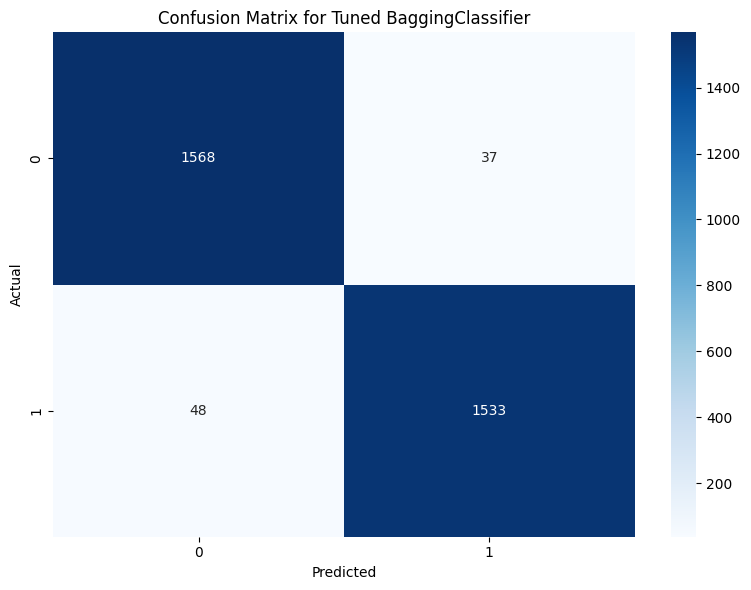

Feature importances not available for this model


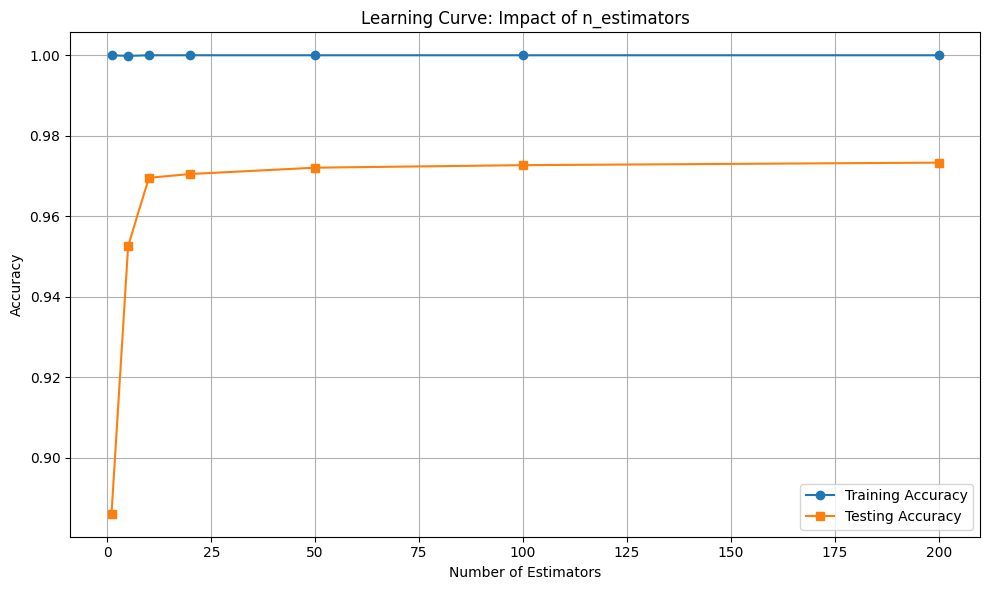

In [78]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a base classifier (Decision Tree in this case)
base_clf = DecisionTreeClassifier(random_state=42)

# Create and train a simple BaggingClassifier with default parameters
bag_clf = BaggingClassifier(estimator=base_clf, random_state=42)
bag_clf.fit(X_train_scaled, y_train)

# Evaluate initial model
y_pred = bag_clf.predict(X_test_scaled)
y_pred_train = bag_clf.predict(X_train_scaled)

initial_accuracy = accuracy_score(y_test, y_pred)

print(f"BaggingClassifier Accuracy test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"BaggingClassifier Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'estimator__max_depth': [None, 5, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=BaggingClassifier(estimator=base_clf, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to find best parameters
print("Starting grid search...")
grid_search.fit(X_train_scaled, y_train)
print("Grid search completed!")

# Get best parameters and score
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}\n")

# Get the best model
best_bag_clf = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_bag_clf.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned BaggingClassifier Accuracy: {tuned_accuracy:.4f}")
print(f"Improvement: {tuned_accuracy - initial_accuracy:.4f}")

# Generate classification report
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_tuned)
classes = sorted(y_test.unique())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, 
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned BaggingClassifier')
plt.tight_layout()
plt.show()

# Visualize feature importance (if available)
if hasattr(best_bag_clf, 'feature_importances_'):
    feature_importances = best_bag_clf.estimator_.feature_importances_
    feature_names = X_train.columns
    
    # Get top 10 features
    indices = np.argsort(feature_importances)[::-1][:10]
    
    plt.figure(figsize=(10, 6))
    plt.title('Top 10 Feature Importances')
    plt.bar(range(10), feature_importances[indices])
    plt.xticks(range(10), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("Feature importances not available for this model")

# Analyzing the impact of n_estimators
n_estimators_range = [1, 5, 10, 20, 50, 100, 200]
train_scores = []
test_scores = []

for n_estimators in n_estimators_range:

    # Create model with current n_estimators value
    bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=best_bag_clf.estimator_.max_depth),
        n_estimators=n_estimators,
        max_samples=best_bag_clf.max_samples,
        max_features=best_bag_clf.max_features,
        bootstrap=best_bag_clf.bootstrap,
        bootstrap_features=best_bag_clf.bootstrap_features,
        random_state=42
    )
    
    # Train model
    bag.fit(X_train_scaled, y_train)
    
    # Evaluate on train and test sets
    train_score = accuracy_score(y_train, bag.predict(X_train_scaled))
    test_score = accuracy_score(y_test, bag.predict(X_test_scaled))
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label='Training Accuracy', marker='o')
plt.plot(n_estimators_range, test_scores, label='Testing Accuracy', marker='s')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Impact of n_estimators')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(f"The best model for Churn Prediction was Bagging Classifier {tuned_accuracy} with a Score of {tuned_accuracy}

### DecisionTreeClassifier

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9013


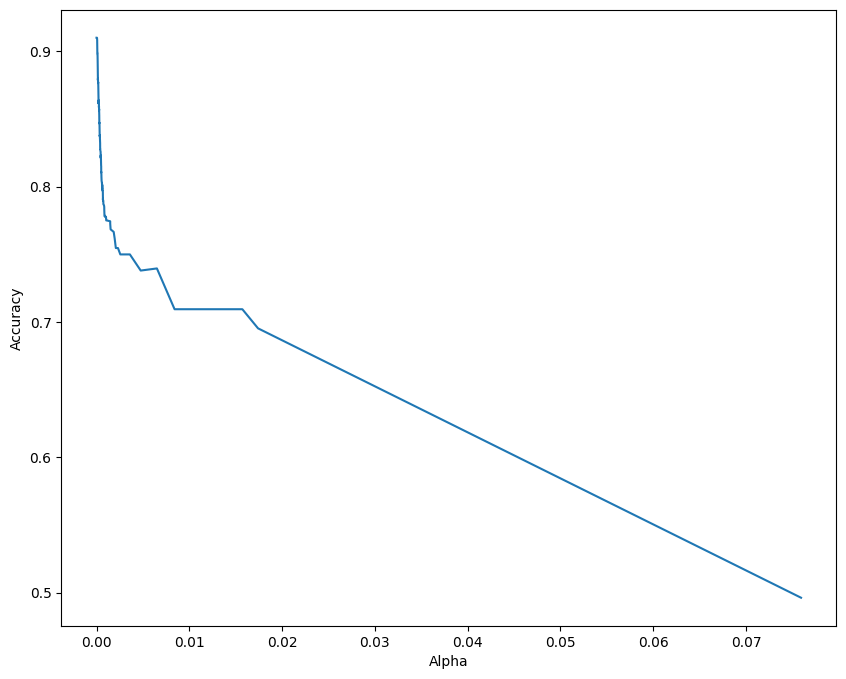

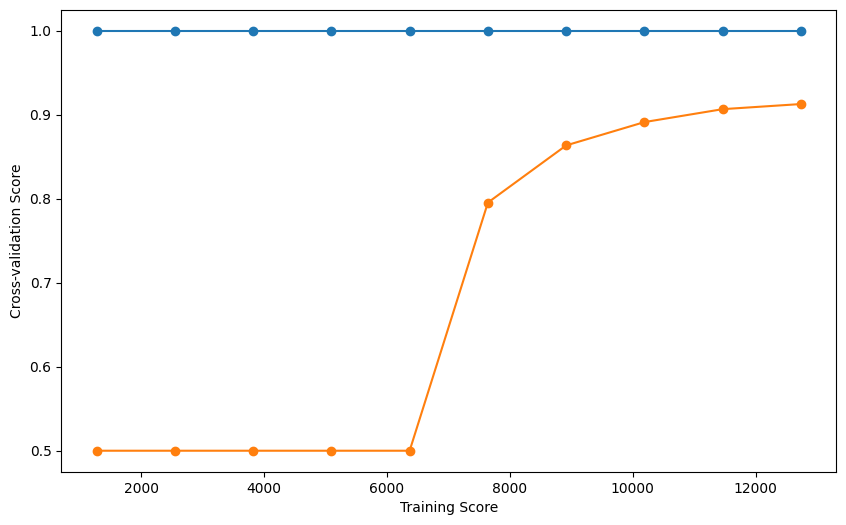

In [92]:
# Define parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

# Create model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Best model
best_dt = grid_search.best_estimator_

# Cost-Complexity Pruning Approach
# Generate pruning path
path = dt.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']

# Test different alpha values
dt_scores = []

for alpha in alphas:
    dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    dt_pruned.fit(X_train, y_train)
    dt_scores.append(dt_pruned.score(X_test, y_test))

# Plot alpha vs accuracy to find optimal value
import matplotlib.pyplot as plt
plt.plot(alphas, dt_scores)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')

# Visualization for Tuning
# Visualizing tree structure and performance metrics helps with parameter selection:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot tree
#cn = sorted(y_test.unique())
#class_names = [str(name) for name in cn]
#feature_names = X_train.columns

# Then plot
#plt.figure(figsize=(20,10))
#tree.plot_tree(dt, filled=True, feature_names=feature_names, class_names=class_names)

# Plot learning curves to detect overfitting
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    dt, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.xlabel('Training Score')
plt.ylabel('Cross-validation Score')
plt.show()

### GradientBoostingClassifier

--- 1. INITIAL MODEL WITH DEFAULT PARAMETERS ---

Accuracy on test set: 0.7919
Accuracy on train set: 0.8056

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1605
           1       0.80      0.78      0.79      1581

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186

--- 2. HYPERPARAMETER TUNING ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_net_command.py", line 111, in send
    sock.sendall(("Content-Length: %s\r\n\r\n" % len(as_bytes)).encode("ascii"))
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_daemon_thread.py", line 53, in run
    self._on_run()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 432, in _on_run
    self.py_db.dispose_and_kill_a


Best parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best cross-validation score: 0.9007

--- 3. EVALUATING OPTIMIZED MODEL ---

Accuracy on test set: 0.9024

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1605
           1       0.87      0.94      0.91      1581

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.91      0.90      0.90      3186



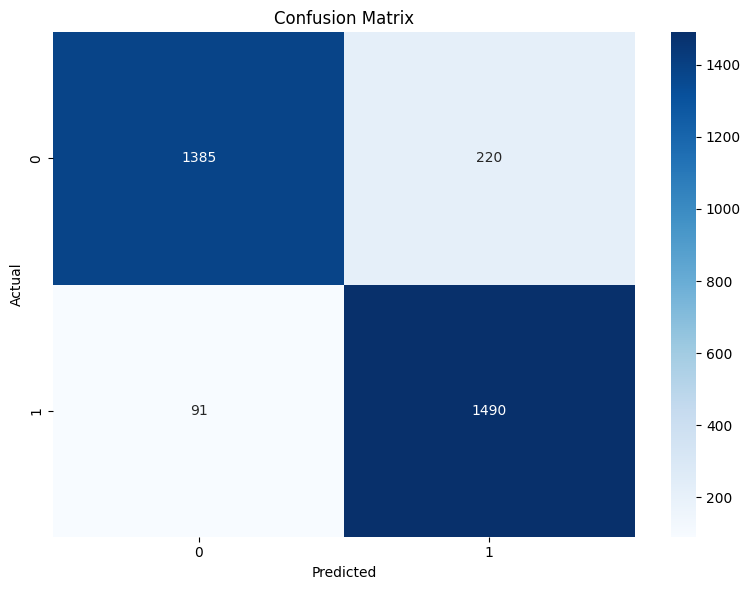

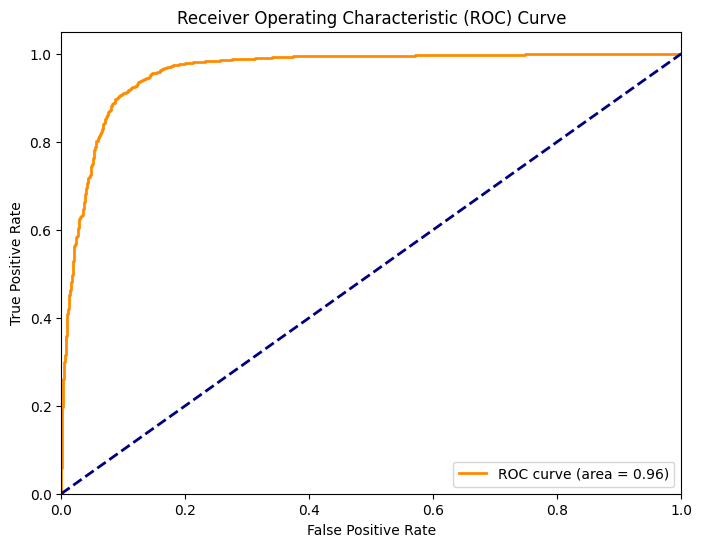

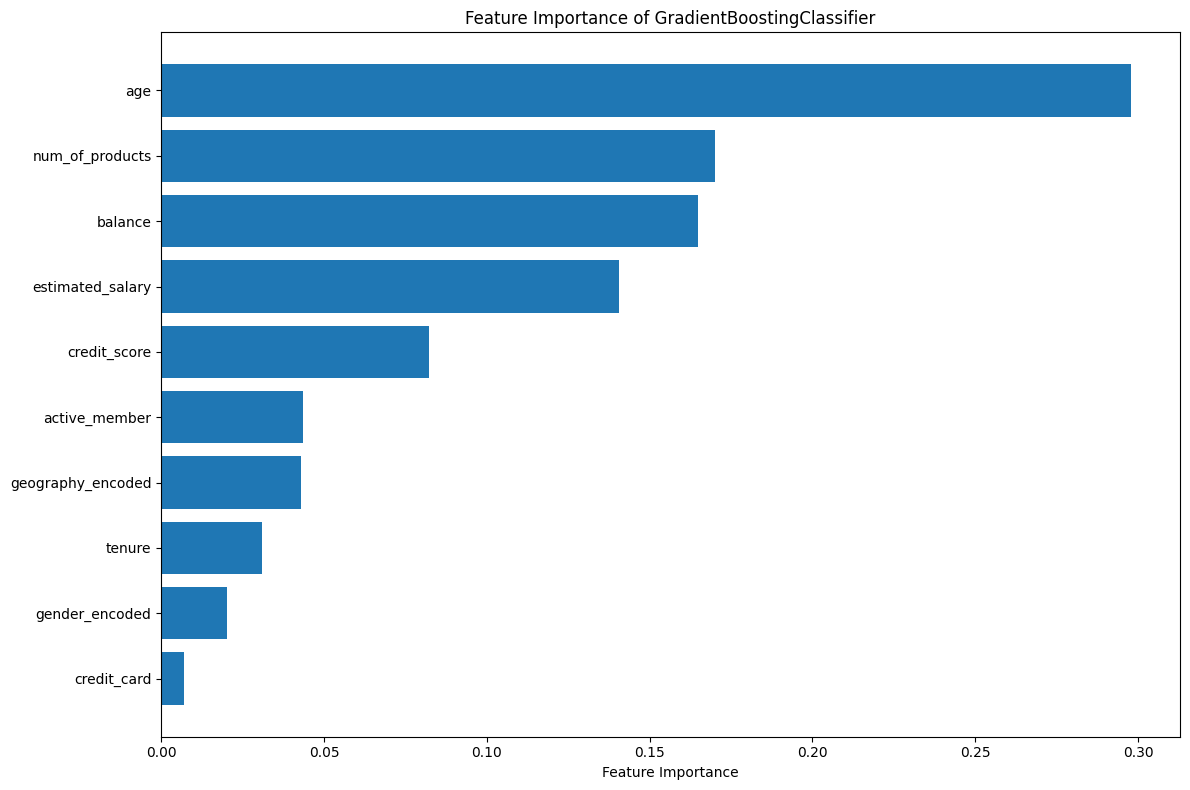

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/py

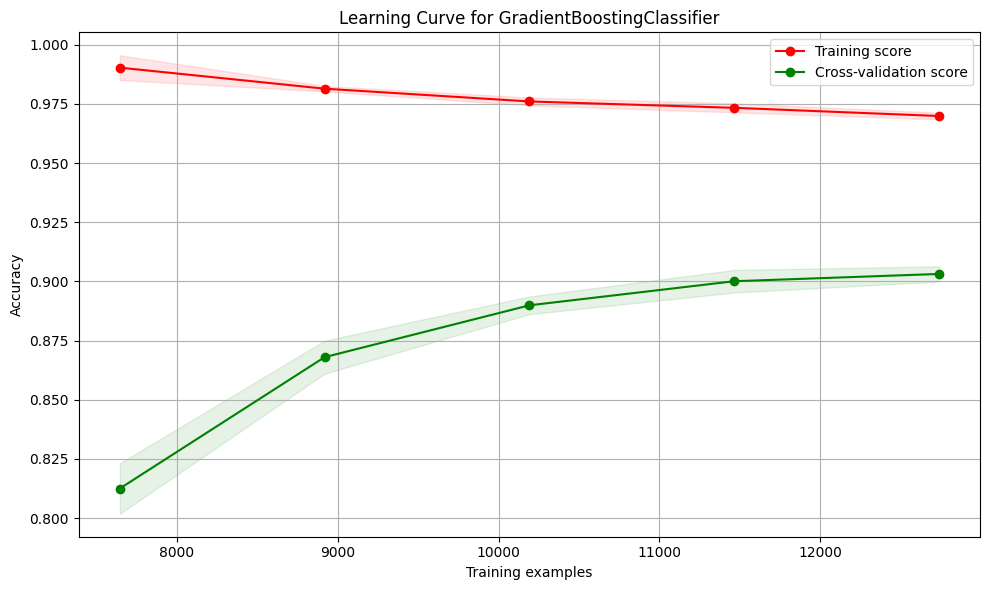

--- 4. GRADIENT BOOSTING WITH EARLY STOPPING ---
Number of estimators used (after early stopping): 500
Accuracy with early stopping: 0.8644


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


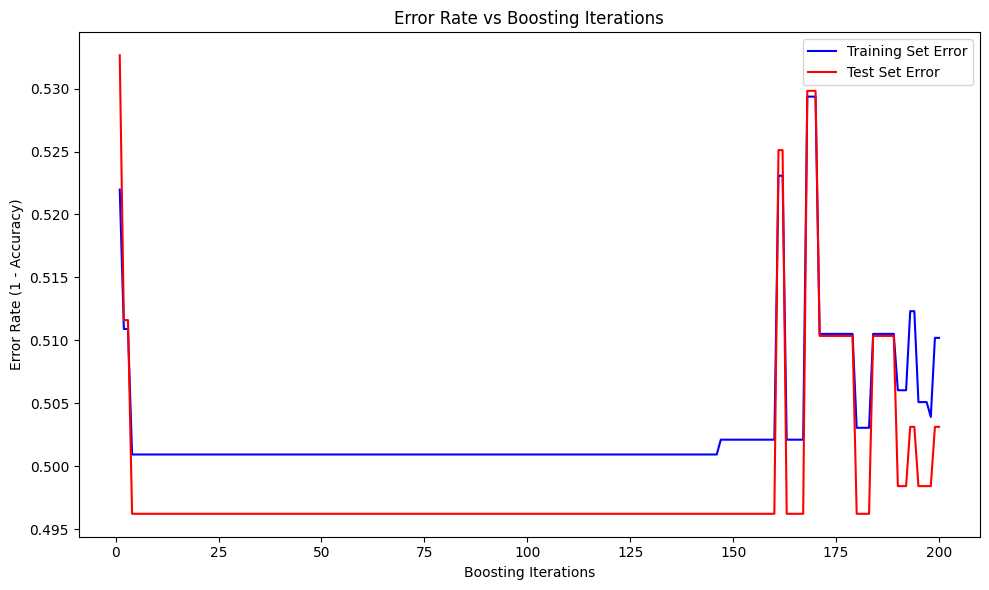

In [95]:
# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# 1. Basic model with default parameters
print("--- 1. INITIAL MODEL WITH DEFAULT PARAMETERS ---")
model = pipeline
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(f"\nAccuracy on test set: {accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy on train set: {accuracy_score(y_train, y_pred_train):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred)) #, target_names=target_names))

# 2. Hyperparameter tuning with GridSearchCV
print("--- 2. HYPERPARAMETER TUNING ---")
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_samples_split': [2, 5],
    'classifier__subsample': [0.8, 1.0]
}

# For demonstration, we're using a smaller param_grid. In practice, you might use more values.
# You could also use RandomizedSearchCV for more efficient searching with a larger param space.

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}\n")

# Get the best model
best_model = grid_search.best_estimator_

# 3. Evaluate the optimized model
print("--- 3. EVALUATING OPTIMIZED MODEL ---")
y_pred_best = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print(f"\nAccuracy on test set: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# 4. Visualizations

# 4.1 Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
classes = sorted(y_test.unique())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
#plt.savefig('confusion_matrix.png')
#plt.close()
plt.show()

# 4.2 Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
#plt.savefig('roc_curve.png')
#plt.close()
plt.show()

# 4.3 Plot feature importance
plt.figure(figsize=(12, 8))
feature_importance = best_model.named_steps['classifier'].feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of GradientBoostingClassifier')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show()

# 4.4 Plot learning curves to analyze bias-variance tradeoff
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5):
    plt.figure(figsize=(10, 6))
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy')
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('learning_curve.png')
    #plt.close()
    plt.show()

plot_learning_curve(best_model, X, y, title="Learning Curve for GradientBoostingClassifier")

# 5. Early stopping example
print("--- 4. GRADIENT BOOSTING WITH EARLY STOPPING ---")

# Create validation set
X_train_es, X_val, y_train_es, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build model with early stopping
early_stopping_model = GradientBoostingClassifier(
    n_estimators=500,  # Set a large number, early stopping will determine the actual number used
    learning_rate=0.1,
    max_depth=4,
    validation_fraction=0.2,
    n_iter_no_change=10,  # Stop if no improvement after 10 iterations
    tol=1e-4,
    random_state=42,
    subsample=0.8
)

early_stopping_model.fit(X_train_es, y_train_es)

print(f"Number of estimators used (after early stopping): {early_stopping_model.n_estimators_}")
y_pred_es = early_stopping_model.predict(X_test)
print(f"Accuracy with early stopping: {accuracy_score(y_test, y_pred_es):.4f}")

# 6. Track deviance (error) during training (stages)
test_score = np.zeros((best_model.named_steps['classifier'].n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(best_model.named_steps['classifier'].staged_predict(X_test)):
    # Simply calculate error rate (1 - accuracy) for each iteration
    test_score[i] = 1.0 - accuracy_score(y_test, y_pred)

plt.figure(figsize=(10, 6))

# Get train scores
train_score = np.zeros((best_model.named_steps['classifier'].n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(best_model.named_steps['classifier'].staged_predict(X_train)):
    train_score[i] = 1.0 - accuracy_score(y_train, y_pred)

plt.plot(np.arange(best_model.named_steps['classifier'].n_estimators) + 1, train_score, 'b-',
         label='Training Set Error')
plt.plot(np.arange(best_model.named_steps['classifier'].n_estimators) + 1, test_score, 'r-',
         label='Test Set Error')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.title('Error Rate vs Boosting Iterations')
plt.tight_layout()
#plt.savefig('bagging_deviance_plot.png')
#plt.close()
plt.show()

### HistGradientBoostingClassifier

Baseline Model Accuracy: 0.8528

Classification Report (Baseline):
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1605
           1       0.84      0.86      0.85      1581

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186


Performing hyperparameter tuning. This may take a while...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'l2_regularization': 7.2900716804098735, 'learning_rate': 0.24138110400578372, 'max_bins': 104, 'max_depth': 12, 'max_iter': 280, 'max_leaf_nodes': 77, 'min_samples_leaf': 37}
Best Cross-Validation Accuracy: 0.9207

Tuned Model Accuracy: 0.9262
Improvement over baseline: 7.34%

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1605
           1       0.89      0.97      0

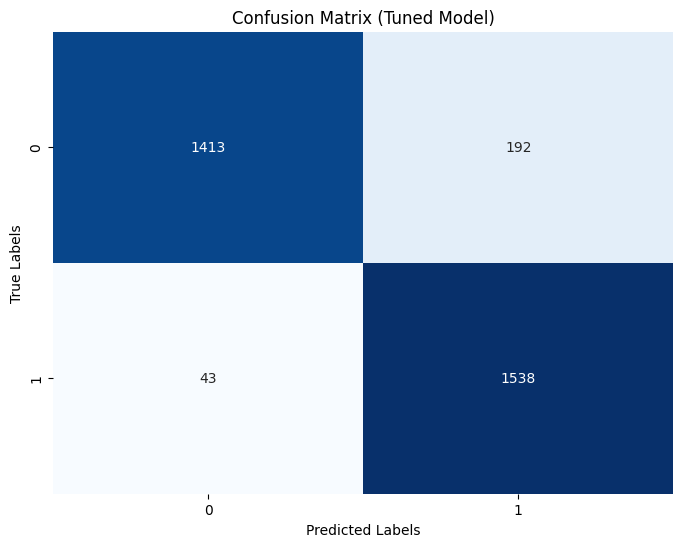

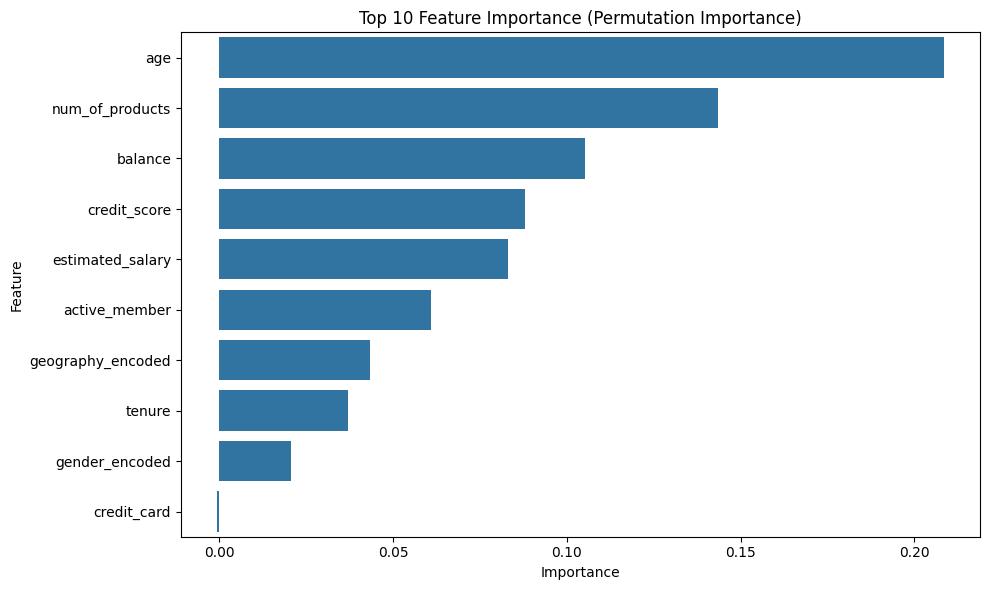

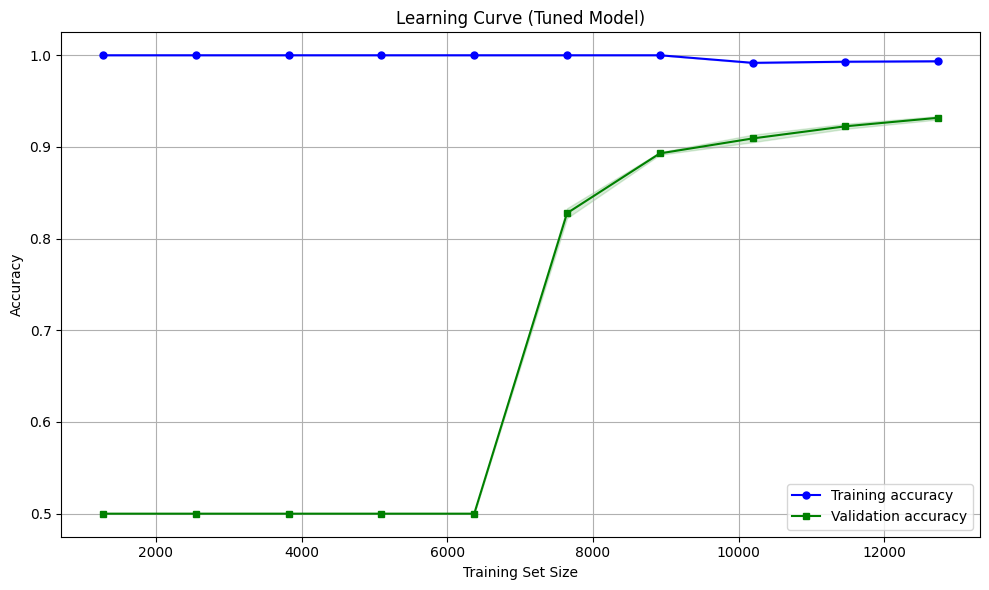

'\n# Example of saving and loading the model \nimport joblib\n\n# Save the model\njoblib.dump(best_model, \'hist_gradient_boosting_model.pkl\')\n\n# Load the model\nloaded_model = joblib.load(\'hist_gradient_boosting_model.pkl\')\n\n# Example of using the model for prediction on new data\n# Simulate new data (same feature count as training data)\nnew_data = np.random.randn(5, X.shape[1])\npredictions = best_model.predict(new_data)\nprobabilities = best_model.predict_proba(new_data)\n\nprint("\nExample Predictions on New Data:")\nfor i, (pred, prob) in enumerate(zip(predictions, probabilities)):\n    print(f"Sample {i+1}: Predicted class = {pred}, Probability = {prob[1]:.4f}")\n'

In [102]:
# Create a baseline HistGradientBoostingClassifier with default parameters
base_model = HistGradientBoostingClassifier(random_state=42)
base_model.fit(X_train, y_train)

# Evaluate the baseline model
y_pred_base = base_model.predict(X_test)
base_accuracy = accuracy_score(y_test, y_pred_base)

print(f"Baseline Model Accuracy: {base_accuracy:.4f}")
print("\nClassification Report (Baseline):")
print(classification_report(y_test, y_pred_base))

# Define parameter grid for hyperparameter tuning
from scipy.stats import randint, uniform
param_distributions = {
    'learning_rate': uniform(0.01, 0.3),
    'max_iter': randint(50, 300),
    'max_depth': randint(3, 15),
    'min_samples_leaf': randint(10, 50),
    'max_leaf_nodes': randint(20, 80),
    'l2_regularization': uniform(0, 10),
    'max_bins': randint(100, 255)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Perform hyperparameter tuning
print("\nPerforming hyperparameter tuning. This may take a while...")
random_search.fit(X_train, y_train)

# Print best parameters and score
print("\nBest Parameters:", random_search.best_params_)
print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.4f}")

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print(f"\nTuned Model Accuracy: {tuned_accuracy:.4f}")
print(f"Improvement over baseline: {(tuned_accuracy - base_accuracy) * 100:.2f}%")

print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))

# Plot confusion matrix for the tuned model
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Tuned Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate feature importance using permutation importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42
)

# Sort features by importance
feature_importance = pd.DataFrame({
    'Feature': X.columns, #[f'Feature {i}' for i in range(X.shape[1])],
    'Importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance (Permutation Importance)')
plt.tight_layout()
plt.show()

# Plot learning curves to assess overfitting
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy', n_jobs=-1, random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve (Tuned Model)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

'''
# Example of saving and loading the model 
import joblib

# Save the model
joblib.dump(best_model, 'hist_gradient_boosting_model.pkl')

# Load the model
loaded_model = joblib.load('hist_gradient_boosting_model.pkl')

# Example of using the model for prediction on new data
# Simulate new data (same feature count as training data)
new_data = np.random.randn(5, X.shape[1])
predictions = best_model.predict(new_data)
probabilities = best_model.predict_proba(new_data)

print("\nExample Predictions on New Data:")
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    print(f"Sample {i+1}: Predicted class = {pred}, Probability = {prob[1]:.4f}")
'''

### KNeighborsClassifier


--- Basic KNN with default parameters ---
Accuracy test set: 0.8249
Accuracy train set: 0.8849

--- Exploring different k values ---
k=1: Cross-validation accuracy = 0.9013
k=3: Cross-validation accuracy = 0.8394
k=5: Cross-validation accuracy = 0.8040
k=7: Cross-validation accuracy = 0.7898
k=9: Cross-validation accuracy = 0.7802
k=11: Cross-validation accuracy = 0.7774
k=13: Cross-validation accuracy = 0.7699
k=15: Cross-validation accuracy = 0.7656
k=17: Cross-validation accuracy = 0.7658
k=19: Cross-validation accuracy = 0.7650
k=21: Cross-validation accuracy = 0.7645
k=23: Cross-validation accuracy = 0.7643
k=25: Cross-validation accuracy = 0.7667
k=27: Cross-validation accuracy = 0.7673
k=29: Cross-validation accuracy = 0.7652


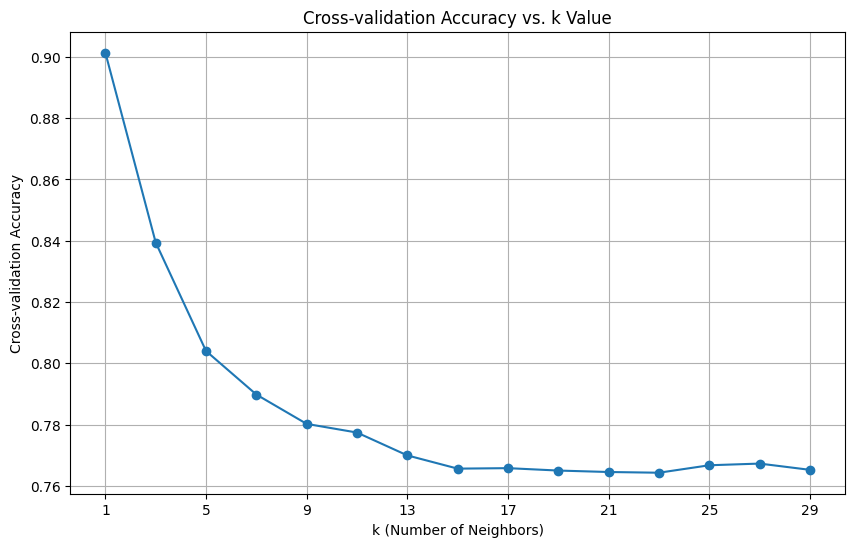


Best k value from cross-validation: 1

--- Comprehensive Grid Search ---
Fitting 5 folds for each of 120 candidates, totalling 600 fits


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 422, in _on_run
    cmd.send(self.sock)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_net_command.py", line 111, in send
    sock.sendall(("Content-Length: %s\r\n\r\n" % len(as_bytes)).encode("ascii"))
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_daemon_thread.py", line 53, in run
    self._on_run()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_comm.py", line 432, in _on_run
    self.py_db.dispose_and_kill_a


Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform'}
Best cross-validation score: 0.9049

--- Final Evaluation on Test Set ---
Accuracy: 0.9187
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1605
           1       0.88      0.97      0.92      1581

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6358
           1       1.00      1.00      1.00      6382

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



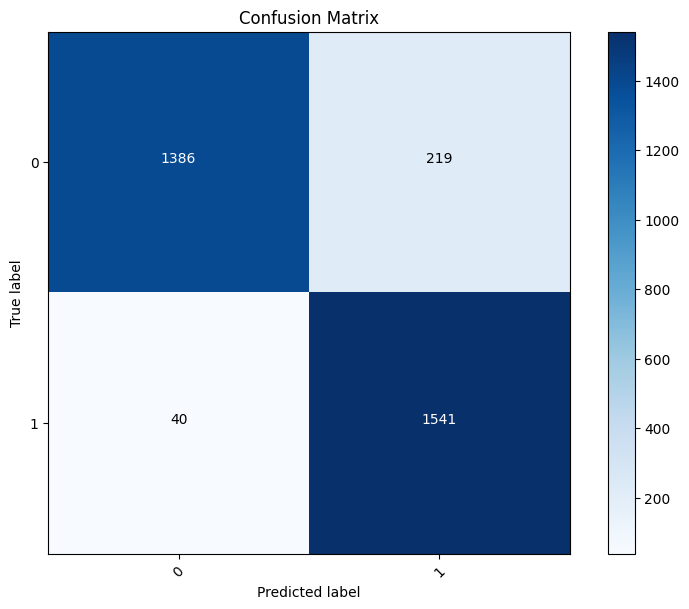


--- Feature Importance Analysis ---
Top 10 most important features:
estimated_salary: 0.8732
balance: 0.7822
age: 0.6579
num_of_products: 0.5700
gender_encoded: 0.5691
credit_score: 0.5308
active_member: 0.4962
credit_card: 0.4922
tenure: 0.4818
geography_encoded: 0.4338


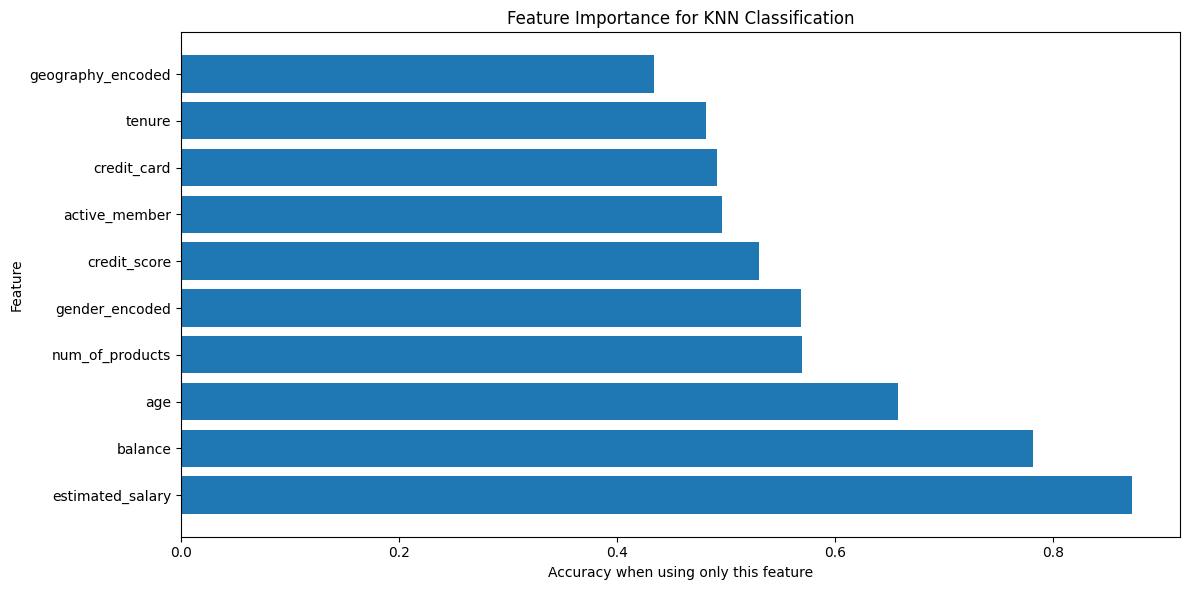


KNN Tuning Complete!


In [104]:
feature_names = X.columns
target_names = sorted(y_test.unique())

# Create a pipeline with preprocessing and KNN classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('knn', KNeighborsClassifier())
])

# 1. Basic KNN with default parameters
print("\n--- Basic KNN with default parameters ---")
pipeline.fit(X_train, y_train)
y_pred_pipe = pipeline.predict(X_test)
y_pred_train_pipe = pipeline.predict(X_train)

print(f"Accuracy test set: {accuracy_score(y_test, y_pred_pipe):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train_pipe):.4f}")

# 2. Exploring the impact of different k values
print("\n--- Exploring different k values ---")
k_values = list(range(1, 31, 2))  # Odd numbers from 1 to 30
cv_scores = []

for k in k_values:
    pipeline.set_params(knn__n_neighbors=k)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"k={k}: Cross-validation accuracy = {scores.mean():.4f}")

# Plot the CV scores vs k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-validation Accuracy vs. k Value')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-validation Accuracy')
plt.grid(True)
plt.xticks(k_values[::2])  # Show every other k value on x-axis
plt.show()
best_k = k_values[np.argmax(cv_scores)]
print(f"\nBest k value from cross-validation: {best_k}")

# 3. Comprehensive GridSearch for hyper-parameter tuning
print("\n--- Comprehensive Grid Search ---")
param_grid = {
    'knn__n_neighbors': list(range(1, 21, 2)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__p': [1, 2]  # p=1 for manhattan, p=2 for euclidean
}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# 4. Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_best_train = best_model.predict(X_train)

print("\n--- Final Evaluation on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Accuracy: {accuracy_score(y_train, y_pred_best_train):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best),'\n')
print(classification_report(y_train, y_pred_best_train))

# 5. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 6. Feature importance analysis for KNN
# KNN doesn't have built-in feature importance, so let's use a simple approach
# looking at per-feature accuracy
print("\n--- Feature Importance Analysis ---")

# Get the best k value from grid search
best_k = grid_search.best_params_['knn__n_neighbors']

# Create a scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize list to store feature importances
feature_importance = []

# For each feature, create a model using only that feature
for i in range(X.shape[1]):
    # Extract single feature
    X_train_single = X_train_scaled[:, i:i+1]
    X_test_single = X_test_scaled[:, i:i+1]
    
    # Create and fit KNN model
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train_single, y_train)
    
    # Predict and calculate accuracy
    y_pred = knn.predict(X_test_single)
    acc = accuracy_score(y_test, y_pred)
    feature_importance.append((feature_names[i], acc))

# Sort features by importance
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Display top 10 most important features
print("Top 10 most important features:")
for feature, importance in feature_importance[:10]:
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
top_features = feature_importance[:10]
plt.figure(figsize=(12, 6))
plt.barh([f[0] for f in top_features], [f[1] for f in top_features])
plt.xlabel('Accuracy when using only this feature')
plt.ylabel('Feature')
plt.title('Feature Importance for KNN Classification')
plt.tight_layout()
plt.show()

print("\nKNN Tuning Complete!")

### Couldn't perform these Light GBM because it is computationally expensive

### LGBMClassifier

In [ ]:
# 1. Grid Search
# Grid Search exhaustively searches through a specified parameter grid. 
# While comprehensive, it can be computationally expensive.

from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import numpy as np

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'num_leaves': [31, 50, 100],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create model
lgbm = LGBMClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',  # change based on your metric
    n_jobs=-1,
    verbose=2
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train model with best parameters
best_lgbm = grid_search.best_estimator_

# 2. Random Search
# Random Search is more efficient than Grid Search for high-dimensional spaces.

from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
import numpy as np

# Define parameter distributions
param_dist = {
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(3, 12),
    'num_leaves': np.arange(20, 200, 10),
    'min_child_samples': np.arange(5, 50, 5),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Create model
lgbm = LGBMClassifier(random_state=42)

# Random search
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=100,  # number of parameter settings sampled
    cv=5,
    scoring='accuracy',  # change based on your metric
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit random search
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Train model with best parameters
best_lgbm = random_search.best_estimator_

# 3. Bayesian Optimization
# Bayesian Optimization is more efficient than both Grid and Random Search for expensive objective functions.

import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(trial):
    params = {
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
    }
    
    lgbm = LGBMClassifier(**params, random_state=42)
    
    # Cross-validation score
    score = cross_val_score(lgbm, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    return score

# Create and run study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Best parameters and score
print("Best parameters:", study.best_params)
print("Best score:", study.best_value)

# Train model with best parameters
best_lgbm = LGBMClassifier(**study.best_params, random_state=42)
best_lgbm.fit(X_train, y_train)

# 7. Evaluate final model
y_pred = best_lgbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final model accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 9. Feature Importance
feature_importance = best_lgbm.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(df.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

### LGBMClassifier 2

In [ ]:
# 1. Feature scaling - not always necessary for tree-based models, but can help
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Baseline model
baseline_model = LGBMClassifier(random_state=42)
baseline_model.fit(X_train_scaled, y_train)
baseline_preds = baseline_model.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, baseline_preds)
print(f"Baseline model accuracy: {baseline_accuracy:.4f}")

# 5. Hyperparameter tuning with Optuna
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
    }
    
    lgbm = LGBMClassifier(**params, random_state=42)
    
    # Use cross-validation to evaluate
    cv_scores = cross_val_score(lgbm, X_train_scaled, y_train, cv=5, scoring='accuracy')
    return cv_scores.mean()

# Create and run study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print results
print("Best parameters:", study.best_params)
print("Best cross-validation score:", study.best_value)

# 6. Train final model with best parameters
best_params = study.best_params
best_model = LGBMClassifier(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

# 7. Evaluate final model
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final model accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 9. Feature Importance
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(data.feature_names)[sorted_idx])
plt.title('Feature Importance')
plt.show()

### LGBMClassifier 3

In [ ]:
# 3. Train baseline model
start_time = time.time()
baseline_model = LGBMClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
baseline_time = time.time() - start_time

print("\n===== Baseline Model =====")
print(f"Training time: {baseline_time:.2f} seconds")
baseline_accuracy, baseline_auc = evaluate_model(baseline_model, X_test, y_test)

# 4. Grid Search CV
def grid_search_tuning(X_train, y_train):
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'num_leaves': [31, 50, 100],
        'min_child_samples': [5, 20, 50],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
    
    model = LGBMClassifier(random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    grid_time = time.time() - start_time
    
    print("\n===== Grid Search CV =====")
    print(f"Time taken: {grid_time:.2f} seconds")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_, grid_search.best_params_, grid_time

# 5. Random Search CV
def random_search_tuning(X_train, y_train):
    param_dist = {
        'learning_rate': np.logspace(-3, -1, 1000),
        'n_estimators': np.arange(50, 500),
        'max_depth': np.arange(3, 12),
        'num_leaves': np.arange(20, 200),
        'min_child_samples': np.arange(5, 100),
        'subsample': np.linspace(0.6, 1.0, 100),
        'colsample_bytree': np.linspace(0.6, 1.0, 100),
        'reg_alpha': np.linspace(0, 1.0, 100),
        'reg_lambda': np.linspace(0, 1.0, 100)
    }
    
    model = LGBMClassifier(random_state=42)
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=50,  # Number of parameter settings sampled
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    
    start_time = time.time()
    random_search.fit(X_train, y_train)
    random_time = time.time() - start_time
    
    print("\n===== Random Search CV =====")
    print(f"Time taken: {random_time:.2f} seconds")
    print(f"Best parameters: {random_search.best_params_}")
    print(f"Best cross-validation score: {random_search.best_score_:.4f}")
    
    return random_search.best_estimator_, random_search.best_params_, random_time

# 6. Optuna (Bayesian Optimization)
def optuna_tuning(X_train, y_train, X_test, y_test):
    def objective(trial):
        params = {
            'objective': 'binary',
            'metric': 'binary_logloss',
            'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'num_leaves': trial.suggest_int('num_leaves', 20, 200),
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
        }
        
        # Use stratified k-fold cross validation
        lgbm = LGBMClassifier(**params, random_state=42)
        scores = cross_val_score(lgbm, X_train, y_train, cv=5, scoring='accuracy')
        return scores.mean()
    
    # Create study
    study = optuna.create_study(direction='maximize')
    
    # Run optimization
    start_time = time.time()
    study.optimize(objective, n_trials=50)
    optuna_time = time.time() - start_time
    
    best_params = study.best_params
    
    print("\n===== Optuna Optimization =====")
    print(f"Time taken: {optuna_time:.2f} seconds")
    print(f"Best parameters: {best_params}")
    print(f"Best value: {study.best_value:.4f}")
    
    # Train model with best parameters
    best_model = LGBMClassifier(**best_params, random_state=42)
    best_model.fit(X_train, y_train)
    
    return best_model, best_params, optuna_time

# Run all tuning methods
print("\nStarting hyperparameter tuning...\n")

# Use a smaller dataset for grid search to save time
if X_train.shape[0] > 10000:
    print("Dataset is large, using a subset for Grid Search...")
    X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=10000, random_state=42)
    grid_model, grid_params, grid_time = grid_search_tuning(X_train_sub, y_train_sub)
    grid_model.fit(X_train, y_train)  # Retrain on full dataset
else:
    grid_model, grid_params, grid_time = grid_search_tuning(X_train, y_train)

random_model, random_params, random_time = random_search_tuning(X_train, y_train)
optuna_model, optuna_params, optuna_time = optuna_tuning(X_train, y_train, X_test, y_test)

# Evaluate all models
print("\n===== Grid Search Model Evaluation =====")
grid_accuracy, grid_auc = evaluate_model(grid_model, X_test, y_test)

print("\n===== Random Search Model Evaluation =====")
random_accuracy, random_auc = evaluate_model(random_model, X_test, y_test)

print("\n===== Optuna Model Evaluation =====")
optuna_accuracy, optuna_auc = evaluate_model(optuna_model, X_test, y_test)

# Compare all models
print("\n===== Model Comparison =====")
models = ["Baseline", "Grid Search", "Random Search", "Optuna"]
accuracies = [baseline_accuracy, grid_accuracy, random_accuracy, optuna_accuracy]
aucs = [baseline_auc, grid_auc, random_auc, optuna_auc]
times = [baseline_time, grid_time, random_time, optuna_time]

comparison_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "AUC": aucs,
    "Time (s)": times
})
print(comparison_df)

# Visualize model comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(models, accuracies)
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.0)

plt.subplot(1, 2, 2)
plt.bar(models, aucs)
plt.title("AUC Comparison")
plt.ylabel("AUC")
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.show()

# Feature importance of the best model
best_model = optuna_model  # Use the best performing model
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Print a summary of the best hyperparameters found
print("\n===== Best Hyperparameters Found =====")
print(f"Best model: Optuna")
for param, value in optuna_params.items():
    print(f"{param}: {value}")